In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import seaborn as sns

In [6]:
df = pd.read_csv('Data.csv', encoding = "ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [7]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [8]:
print(len(train))
print(len(test))

3975
378


In [9]:
train

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,2015-12-24,0,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,...,Report on sexual exploitation and abuse by pea...,Baby girl dies after X-president's son's staff...,China smog sparks red alerts in 10 cities,US planned East Berlin's 'systematic destructi...,Qatar World Cup 2022 workers 'earning as littl...,Thai Court Sentences Two to Death for Killings...,Germany Pays to Halt Danish Wind Power to Prot...,Egypts President Sisi Urges Islamic Scholars t...,Russia Rejects Amnesty Internationals Re

In [10]:
test

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3723,2015-01-02,1,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,...,Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...
3724,2015-01-05,0,Moscow-&gt;Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel-Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,...,The Islamic State has approved a 2015 budget o...,"Iceland To Withdraw EU Application, Lift Capit...",Blackfield Capital Founder Goes Missing: The v...,Rocket stage crashes back to Earth in rural Ch...,2 Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM; says ...,3 Vietnamese jets join search for 16 missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps
3725,2015-01-06,0,US oil falls below $50 a barrel,"Toyota gives away 5,680 fuel cell patents to b...",Young Indian couple who had been granted polic...,A senior figure in Islamic States self-declare...,Fukushima rice passes radiation tests for 1st ...,Nearly all Spanish parties guilty of financial...,King Abdullah to abdicate Saudi Throne,Taliban Commander Caught Networking On LinkedIn,...,Thousands of Indians have fled from their home...,Turkey sacks judges who oversaw Erdogan corrup...,SpaceX Falcon 9 launch and recovery has been a...,CNN: Americans charged in botched Gambia coup,Islamic State 'Police' Official Beheaded.,Libya bans Palestinians from country to preven...,A judicial inquiry was opened in France on Mon...,Video has captured the moment a cameraman was ...,Syria has complained to the United Nations tha...,"Tests over, India set to make the iris of bigg..."
3726,2015-01-07,1,'Shots fired' at French magazine HQ,90% of Bibi Netanyahus Campaign Funds From U.S.,ISIS behead street magician for entertaining c...,Denmark sets new world record in renewable ene...,"ISIS Closes Schools In Syria, Leaving 670000 C...",The European Union wants Turkey to explain how...,10 people have died in a shooting at the headq...,Most Earth-like planet ever discovered could b...,...,Discovery of witnesss mutilated body feeds cla...,Radical Islam a growing threat to sub-Saharan ...,Tony Blair may 'face war crime charges' over I...,Benjamin Netanyahu says settlements unlikely t...,Tasmania moves to allow corporations to sue pr...,Indonesia search chief: Tail section of AirAsi...,"North Korean Defector: ""Bureau 121"" Hackers lo...",Female suicide bomber attacks police station i...,IS to turn Syria schools into religious indoct...,Ebola vaccine trials in Halifax so far a success
3727,2015-01-08,1,New Charlie Hebdo issue to come out next week:...,"Ahmed Merabet, Cop Killed In Paris Attacks, Wa...",Youngest Suspect in Charlie Hebdo Attack Turns...,"Grenades thrown at a mosque in Le Mans, west o...",Danish newspaper to print Charlie Hebdo cartoo...,M

In [11]:
data = train.drop(['Date', 'Label'],axis=1)
data1 = test.drop(['Date', 'Label'],axis=1)

In [12]:
data

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,North Korea slave force earns Kim Jong Un regi...,"50,000 Yemeni Forces Preparing to Attack Saudi...",...,Report on sexual exploitation and abuse by pea...,Baby gir

In [13]:
data['Top1'][:9]

0    A 'hindrance to operations': extracts from the...
1                                            Scorecard
2                    Coventry caught on counter by Flo
3                        Pilgrim knows how to progress
4                                 Hitches and Horlocks
5                                     Fifth round draw
6                        Man Utd 2 - 0 South Melbourne
7                  Newcastle seek new football supremo
8                     Bungling officials on the carpet
Name: Top1, dtype: object

In [14]:
data.replace(['^a-zA-Z'],' ',inplace=True)

In [15]:
# data1.replace(['^a-zA-Z'],' ',inplace=True)

In [16]:
index = [str(i) for i in range(25)]
index

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

In [17]:
data.columns = index

In [18]:
# data1.columns = index

In [19]:
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,North Korea slave force earns Kim Jong Un regi...,"50,000 Yemeni Forces Preparing to Attack Saudi...",...,Report on sexual exploitation and abuse by pea...,Baby girl dies after X-president's son's staff...,China smog sparks r

In [20]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974],
           dtype='int64', length=3975)

In [21]:
for x in index:
    data[x] = data[x].str.lower()
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader: german sleaze inquiry,"cheerio, boyo",the main recommendations,has cubie killed fees?,has cubie killed fees?,has cubie killed fees?,hopkins 'furious' at foster's lack of hannibal...,has cubie killed fees?,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man's extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn't know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united's rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne (australia),necaxa (mexico),real madrid (spain),raja casablanca (morocco),corinthians (brazil),tony's pet project,al nassr (saudi arabia),ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,"auntie back in fashion, even if the dress look...",shoaib appeal goes to the top,hussain hurt by 'shambles' but lays blame on e...,england's decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for...,christmas glitches,"upending a table, chopping a line and scoring ...","scientific evidence 'unreliable', defence claims",fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake-up of failing nhs,lessons of law's hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers: are you all whingers?,hollywood beyond,ashes and diamonds,whingers - a formidable minority,alan parker - part two,"thuggery, toxins and ties",...,most everywhere: udis,most wanted: chloe lunettes,return of the cane 'completely off the agenda',from sleepy hollow to greeneland,blunkett outlines vision for over 11s,"embattled dobson attacks 'play now, pay later'...",doom and the dome,what is the north-south divide?,aitken released from jail,gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,"brazil declares emergency after 2,400 babies a...",scientists find big 1500-yr-old viking settlem...,paris attacks: belgian police arrest ninth sus...,wiretapping reveals communication between turk...,russia airstrikes: hundreds of syrian civilans...,pakistan changes neutral position on syrian ci...,north korean diplomat arrested in south africa...,german teachers want 'mein kampf' on syllabus,north korea slave force earns kim jong un regi...,"50,000 yemeni forces preparing to attack saudi...",...,report on sexual exploitation and abuse by pea...,baby girl dies after x-president's son's staff...,china smog sparks r

In [22]:
# for x in index:
#     data1[x] = data1[x].str.lower()
# data1

In [23]:
handlines = ' '.join([str(i) for i in data.iloc[0,0:25]])
handlines

"a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title"

In [24]:
handlines = []
for x in range(0,len(data)):
    handlines.append(' '.join([str(i) for i in data.iloc[x,0:25]]))
handlines[:3]

["a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title",
 "scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main

In [25]:
len(handlines)

3975

In [26]:
cv = CountVectorizer(ngram_range=(2,2))

In [27]:
train_cv = cv.fit_transform(handlines)

In [28]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy')

In [29]:
model = rfc.fit(train_cv, train['Label'])

In [30]:
model

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [31]:
# data1.head()

In [32]:
test_handlines = []
for x in range(0,len(test)):
    test_handlines.append(' '.join([str(i) for i in test.iloc[x,2:27]]))
test_handlines[:3]

['Most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles, diet or even inherited genes, new research suggests. Random mutations that occur in DNA when cells divide are responsible for two thirds of adult cancers across a wide range of tissues. Iran dismissed United States efforts to fight Islamic State as a ploy to advance U.S. policies in the region: "The reality is that the United States is not acting to eliminate Daesh. They are not even interested in weakening Daesh, they are only interested in managing it" Poll: One in 8 Germans would join anti-Muslim marches UK royal family\'s Prince Andrew named in US lawsuit over underage sex allegations Some 40 asylum-seekers refused to leave the bus when they arrived at their destination in rural northern Sweden, demanding that they be taken back to Malm or "some big city". Pakistani boat blows self up after India navy chase. All four people on board the vessel from near the Pakistani port city of Karachi are b

In [33]:
len(test_handlines)

378

In [34]:
cv_te = CountVectorizer(ngram_range=(2,2))
# .transform(test_handlines)

In [35]:
test_data = cv.transform(test_handlines)

In [36]:
test_data.shape

(378, 598207)

In [37]:
pred = rfc.predict(test_data)

In [38]:
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [39]:
cm = confusion_matrix(test['Label'],pred)

In [40]:
print(accuracy_score(test['Label'],pred))

0.843915343915344


[[137  49]
 [ 10 182]]


<AxesSubplot:>

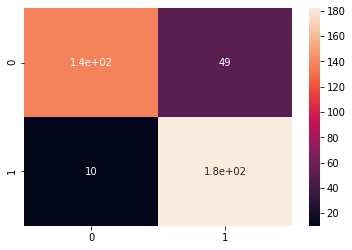

In [41]:
print(cm)
sns.heatmap(cm, annot=True)

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
mNB = MultinomialNB()

In [45]:
mNB.fit(train_cv, train['Label'])

MultinomialNB()

In [46]:
mNB.predict(test_data)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
cm = confusion_matrix(test['Label'],pred)
print(accuracy_score(test['Label'],pred))

0.843915343915344


[[137  49]
 [ 10 182]]


<AxesSubplot:>

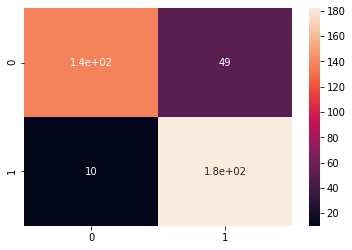

In [49]:
print(cm)
sns.heatmap(cm, annot=True)

In [35]:
# def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
#     X_c = nlp_model.fit_transform(X)
#     print('features: {}'.format(X_c.shape[1]))
#     X_train, X_test, y_train, y_test = train_test_split(X_c, y)
#     print(' train records: {}'.format(X_train.shape[0]))
#     print(' test records: {}'.format(X_test.shape[0]))
#     ml =ml_model.fit(X_train, y_train)
#     acc = ml.score(X_test, y_test)
#     print ('Model Accuracy: {}'.format(acc))
    
#     if coef_show == 1: 
#         w = nlp_model.get_feature_names()
#         coef = ml.coef_.tolist()[0]
#         coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
#         coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
#         print('\n')
#         print('-Top 20 positive-')
#         print(coeff_df.head(20).to_string(index=False))
#         print('\n')
#         print('-Top 20 negative-')        
#         print(coeff_df.tail(20).to_string(index=False))

In [36]:
# text_fit()

# Data Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x = df.drop(['Date','Label'], axis=1)

In [71]:
x.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [125]:
y = df['Label']

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [162]:
print('x_train')
print(x_train.head(1))
print('x_test')
print(x_test.head(1))
print('y_train')
print(y_train.head(1))
print('y_test')
print(y_test.head(1))

x_train
                                                   Top1  \
3813  Japan struck by 6.7 magnitude earthquake. Afte...   

                                                   Top2  \
3813  President Barack Obama:''Palestinians deserve ...   

                                                   Top3  \
3813  Vatican officially recognizes 'state of Palest...   

                                                   Top4  \
3813  "Time has come to reexamine cannabis prohibiti...   

                                                   Top5  \
3813  Developing reports claim that Pakistan's army ...   

                                                   Top6  \
3813  Tory officials threatened BBC during election ...   

                                                   Top7  \
3813  Pope: God will judge you on whether you cared ...   

                                                   Top8  \
3813  BBC reporting a coup in Burundi has effectivel...   

                                        

In [163]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3280, 25)
(821, 25)
(3280,)
(821,)


In [166]:
x_train.replace(['^a-zA-Z'],' ',inplace=True)

In [167]:
x_test.replace(['^a-zA-Z'],' ',inplace=True)

In [168]:
x_train_allColumns = []
for row in range(0,len(x_train)):
    x_train_allColumns.append(' '.join([str(x) for x in x_train.iloc[row,0:25]]))
x_train_allColumns[:3]

['Japan struck by 6.7 magnitude earthquake. After shocks expected. President Barack Obama:\'\'Palestinians deserve an end to occupation\'\' Vatican officially recognizes \'state of Palestine\' in new treaty "Time has come to reexamine cannabis prohibition, Israel\'s police chief says" Developing reports claim that Pakistan\'s army not only knew where Osama bin Laden was hiding, but complicit in protecting him since 2006 Tory officials threatened BBC during election - senior BBC executives faced repeated threats of far-reaching reforms if they didnt change election campaign coverage Pope: God will judge you on whether you cared for Earth BBC reporting a coup in Burundi has effectively removed President Nkurunziza. 40 shia muslims gunned down by gunmen in a bus in Pakistan. Chancellor Angela Merkel is set to face further political embarrassment over Berlins spy scandal following new revelations that US intelligence planned to obtain unlimited access to Germanys main internet cable networ

In [169]:
x_test_allColumns = []
for row in range(0,len(x_test)):
    x_test_allColumns.append(' '.join([str(x) for x in x_test.iloc[row,0:25]]))
x_test_allColumns[:3]

["Burns keeps German lead League admits failings in case of Cunningham Australia 48 - 6 New Zealand Leeds 27 - 22 London All Blacks promise fearsome blitz Fifth triumph in sight but time's arrow targets Armstrong Now every half-second counts Revealed: the prettiest boy in the kit room Lynn is king for the day as Bjorn slips away Nayef looks all set  to go one better this time Wrong-card Roe relaunches his career with a smile Victory Moon rises out of Africa for acid test at Ascot Guide to TV races: French raider Ratio the International tip Carry On Katie breezes home Fogarty finds pain in the pits Husband on hand to help Sorenstam back on track Beirut gets grand prix makeover . . . and India catch the bug as a saviour is sought for spinners England washed out after bowlers hosed down . . . Holyfield is back on track for Toney Trials in danger of becoming footnote Danvers falls before first hurdle China salutes Beckham the new galactico Knee injury finally forces Haaland to retire QPR i

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [171]:
cv = CountVectorizer(ngram_range=(2,2))

In [172]:
x_train = cv.fit_transform(x_train_allColumns)

In [180]:
# x_test = cv.fit_transform(x_test_allColumns)
x_test = cv.transform(x_test_allColumns)

In [181]:
x_train.shape

(3280, 515512)

In [182]:
x_test.shape

(821, 163602)

In [183]:
randomf = RandomForestClassifier(n_estimators=200, criterion='entropy')

In [192]:
randomf = randomf.fit(x_train,y_train)

In [195]:
# randomf.score(x_test,y_test)

In [196]:
# pred_split = randomf.predict(x_test)